In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import seaborn as sns
import sklearn as sk
import scipy.stats as stats
import statsmodels.stats.power as power_models
import statsmodels.stats.diagnostic as diagnostic
import statsmodels.stats.weightstats as tests
import statsmodels.stats.proportion as proportion

In [240]:
%pwd  #look at the current work dir
%cd   C:/Users/josep/Documents/Tufts/MS_thesis

C:\Users\josep\Documents\Tufts\MS_thesis


In [241]:
df=pd.read_excel("study_results.xlsx",1)

In [242]:
df['L_score']=df.iloc[:,12:22].sum(axis='columns')
df['S_score']=df.iloc[:,2:12].sum(axis='columns')

In [243]:
df_full=df.copy()

In [244]:
df_with_outlier=df.drop([28]).copy()

In [245]:
df.drop([9,28],inplace=True)

In [246]:
df_word=df_with_outlier[df_with_outlier['Group']=='word']
df_phrase=df_with_outlier[df_with_outlier['Group']=='line']

In [247]:
df_word

,Subject ID,Group,S1,S2,S3,S4,S5,S6,S7,S8,...,C4,C5,C6,C7,C8,C9,C10,Total,L_score,S_score
0,1,word,0,10,10,10,10,0,10,10,...,16.00,20.00,0.00,20.00,17.50,0.00,15.71,125.60,55.60,70
1,2,word,0,0,10,10,0,10,10,0,...,16.00,0.00,20.00,10.00,0.00,0.00,18.00,82.89,32.89,50
2,3,word,10,10,10,10,0,10,0,0,...,16.00,10.00,20.00,10.00,3.33,17.14,20.00,152.54,82.54,70
3,4,word,0,10,10,10,0,0,10,10,...,16.00,0.00,0.00,20.00,17.50,20.00,20.00,139.75,69.75,70
4,5,word,10,10,10,0,0,0,10,0,...,0.00,10.00,0.00,18.00,0.00,20.00,10.00,109.96,49.96,60
5,6,word,10,10,10,10,10,0,10,10,...,17.14,11.66,0.00,15.00,18.18,18.57,10.00,142.51,52.51,90
6,7,word,10,10,10,0,0,10,10,0,...,0.00,3.75,20.00,18.00,0.00,16.67,0.00,110.38,50.38,60
7,8,word,10,10,10,10,0,0,10,0,...,14.29,10.00,6.00,10.00,10.00,20.00,10.00,126.54,56.54,70
8,9,word,10,10,10,10,0,0,10,0,...,16.00,5.00,6.00,10.00,6.67,15.71,20.00,125.63,55.63,70
9,10,word,0,0,0,0,0,0,0,0,...,0.00,6.67,0.00,0.00,0.00,0.00,0.00,21.81,21.81,0


# Overall Performance

In [273]:
diagnostic.kstest_normal(df_word['S_score'])

(0.2169864577683559, 0.02445785798884079)

In [274]:
diagnostic.kstest_normal(df_phrase['S_score'])

(0.22281834813525725, 0.02436693859175368)

In [263]:
df_with_outlier['Total'].std()

37.39056324571659

In [265]:
def effect_size(score):
    return (df_word[score].mean()-df_phrase[score].mean())/df_with_outlier[score].std()

In [268]:
effect_size('S_score')

0.9798441168218374

## Composite Scores

Text(0.5, 1.0, 'Histogram of Subject Composite Results')

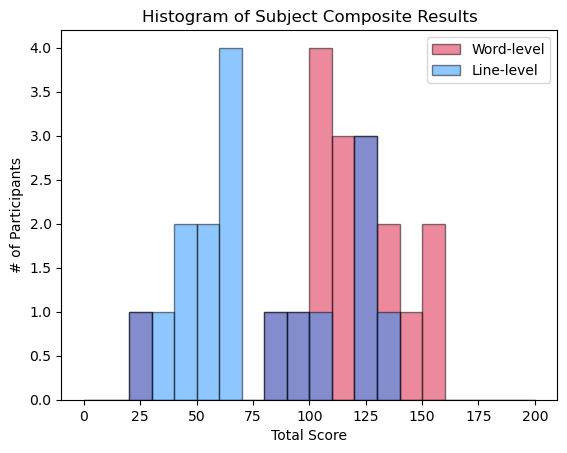

In [213]:
bins = np.linspace(0, 200, 21)

plt.hist(df_word['Total'], bins, color='crimson', alpha=0.5, edgecolor='black', label='Word-level')
plt.hist(df_phrase['Total'], bins, color='dodgerblue', alpha=0.5, edgecolor='black', label='Line-level')

plt.xlabel('Total Score')
plt.ylabel('# of Participants')
plt.legend(loc='upper right')
plt.title('Histogram of Subject Composite Results')

<Axes: xlabel='Group', ylabel='Total'>

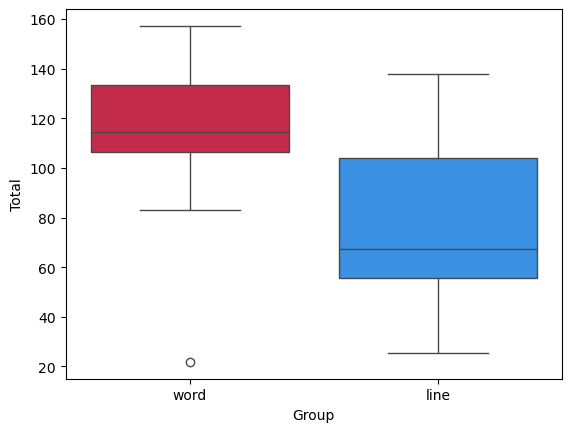

In [215]:
sns.boxplot(x="Group", y="Total", hue="Group", palette=['crimson', 'dodgerblue'], data=df_with_outlier)

In [216]:
tests.ttest_ind(df_word['Total'],df_phrase['Total'])

(3.309722110577186, 0.002266184030231216, 33.0)

## Linguistic Scores

Text(0.5, 1.0, 'Histogram of Subject Linguistic Scores')

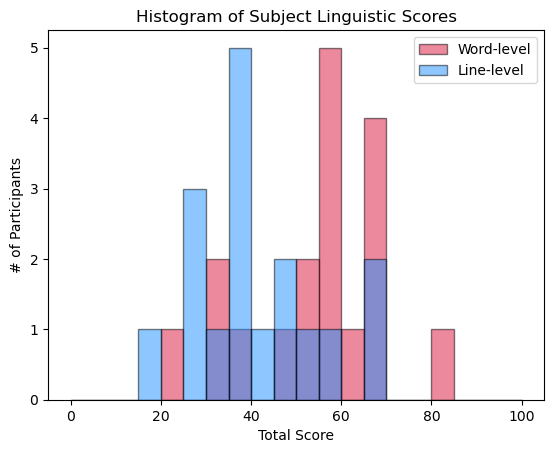

In [217]:
bins = np.linspace(0, 100, 21)

plt.hist(df_word['L_score'], bins, color='crimson', alpha=0.5, edgecolor='black', label='Word-level')
plt.hist(df_phrase['L_score'], bins, color='dodgerblue', alpha=0.5, edgecolor='black', label='Line-level')

plt.xlabel('Total Score')
plt.ylabel('# of Participants')
plt.legend(loc='upper right')
plt.title('Histogram of Subject Linguistic Scores')

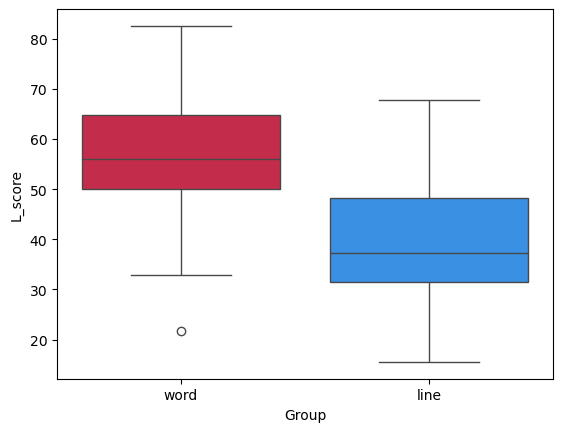

In [218]:
sns.boxplot(x="Group", y="L_score", hue="Group", palette=['crimson', 'dodgerblue'], data=df_with_outlier)
plt.show()

In [219]:
tests.ttest_ind(df_word['L_score'],df_phrase['L_score'])

(2.6931393609003833, 0.01103664108638822, 33.0)

## Semantic Scores

Text(0.5, 1.0, 'Histogram of Subject Semantic Scores')

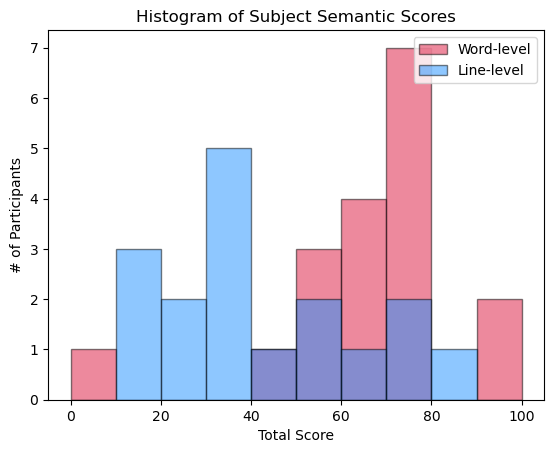

In [220]:
bins = np.linspace(0, 100, 11)

plt.hist(df_word['S_score'], bins, color='crimson', alpha=0.5, edgecolor='black', label='Word-level')
plt.hist(df_phrase['S_score'], bins, color='dodgerblue', alpha=0.5, edgecolor='black', label='Line-level')

plt.xlabel('Total Score')
plt.ylabel('# of Participants')
plt.legend(loc='upper right')
plt.title('Histogram of Subject Semantic Scores')

<Axes: xlabel='Group', ylabel='S_score'>

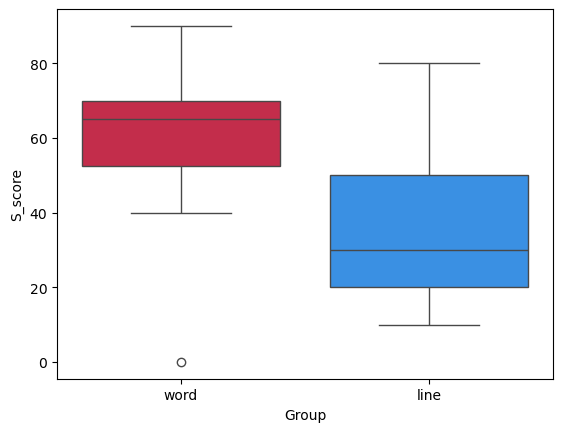

In [222]:
sns.boxplot(x="Group", y="S_score", hue="Group", palette=['crimson', 'dodgerblue'], data=df_with_outlier)

In [223]:
tests.ttest_ind(df_word['S_score'],df_phrase['S_score'])

(3.2890427390208, 0.002394843882930953, 33.0)

In [277]:
stats.kruskal(df_word['S_score'],df_phrase['S_score']).pvalue

0.0038150584204466502

# By Question

In [224]:
question_types=["verb","nominal","verb","nominal","verb","nominal","verb","nominal","nominal","verb"]

## Composite Scores

KruskalResult(statistic=1.4922126511789844, pvalue=0.22187347165115667)
KruskalResult(statistic=1.5493337985114386, pvalue=0.21323381720055015)
KruskalResult(statistic=1.336034766267343, pvalue=0.2477344574938981)
KruskalResult(statistic=3.6777911808068695, pvalue=0.055141854601101006)
KruskalResult(statistic=0.02243589743590594, pvalue=0.8809333191175741)
KruskalResult(statistic=0.7692848727822863, pvalue=0.38043837359744803)
KruskalResult(statistic=4.635226787532454, pvalue=0.031322004381661286)
KruskalResult(statistic=0.1984965938454565, pvalue=0.6559370985249657)
KruskalResult(statistic=6.303501250446593, pvalue=0.012049974325319492)
KruskalResult(statistic=5.8423152701203716, pvalue=0.0156452264720643)


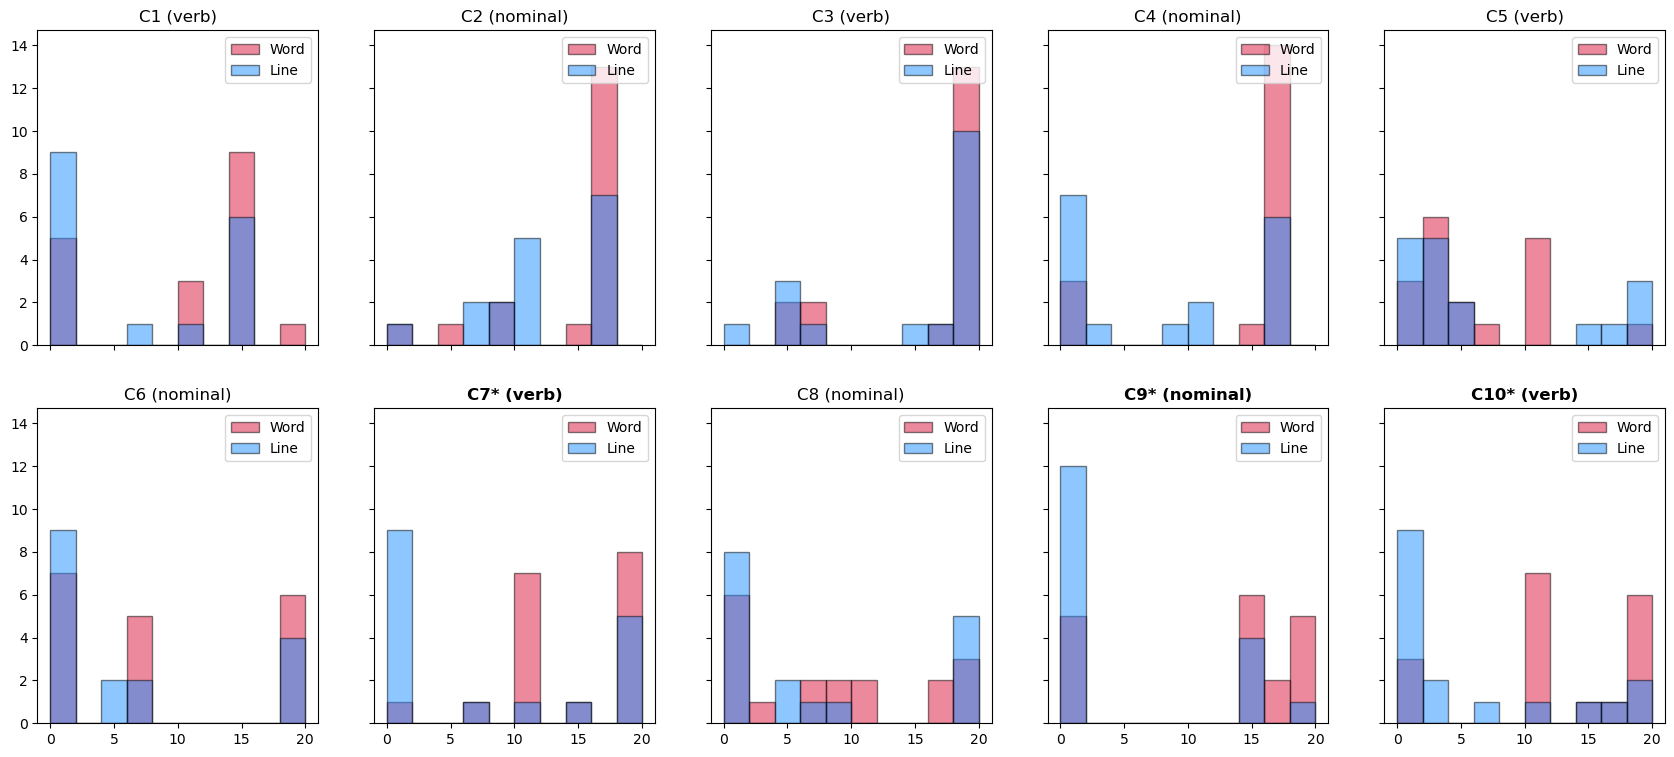

In [276]:
bins = np.linspace(0, 20, 11)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(21,9), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    q=i+1
    q_name='C'+str(q)
    t_test=stats.kruskal(df_word[q_name],df_phrase[q_name])
    print(t_test)
    ax.hist(df_word[q_name], bins, color='crimson', alpha=0.5, edgecolor='black', label='Word')
    ax.hist(df_phrase[q_name], bins, color='dodgerblue', alpha=0.5, edgecolor='black', label='Line')
    ax.legend(loc='upper right')
    if t_test[1]<.01:
        ax.set_title(q_name+"** ("+question_types[q-1]+")",fontweight="bold")
    elif t_test[1]<.05:
        ax.set_title(q_name+"* ("+question_types[q-1]+")",fontweight="bold")
    else:
        ax.set_title(q_name+" ("+question_types[q-1]+")")
    #ax.set_xticks(df.iloc[:,0])
plt.show()

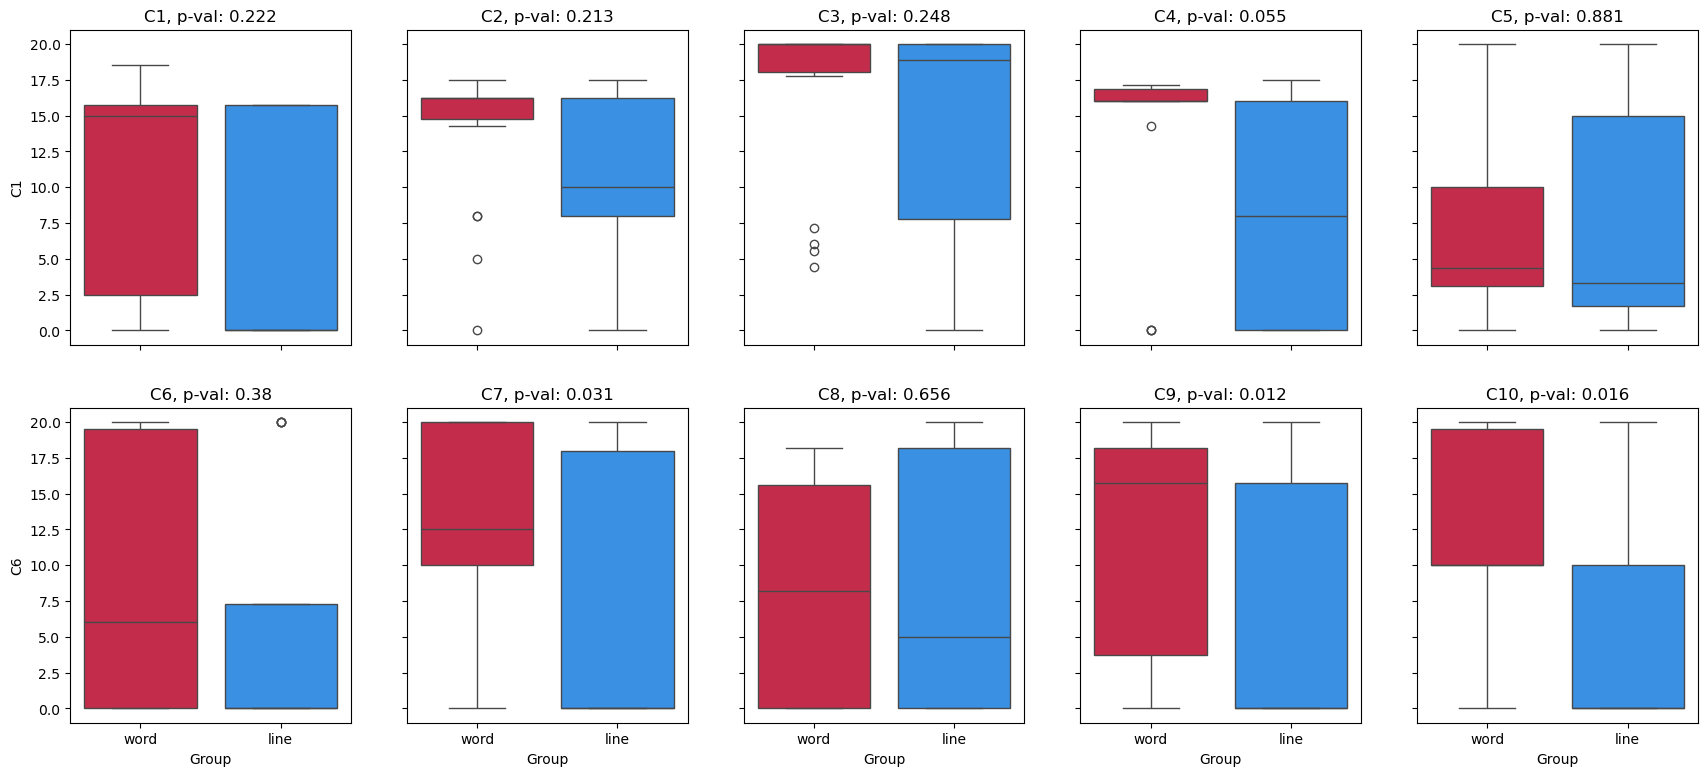

In [278]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(21,9), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    q=i+1
    q_name='C'+str(q)
    sns.boxplot(
        x="Group", 
        y=q_name, 
        hue="Group", 
        palette=['crimson', 'dodgerblue'], 
        data=df_with_outlier,
        legend=False,
        ax=ax
    ).set_title(q_name+", p-val: "+str(round(stats.kruskal(df_word[q_name],df_phrase[q_name]).pvalue,3)))
    #ax.legend(loc='upper right')
plt.show()

## Linguistic Scores

KruskalResult(statistic=0.7424593967517543, pvalue=0.3888741828756982)
KruskalResult(statistic=2.8495065789473863, pvalue=0.09140198513355313)
KruskalResult(statistic=1.595108941325387, pvalue=0.20659772460705902)
KruskalResult(statistic=2.3123123123123404, pvalue=0.12835298517205343)
KruskalResult(statistic=0.23468395203471462, pvalue=0.6280722900376821)
KruskalResult(statistic=0.7692848727822863, pvalue=0.38043837359744803)
KruskalResult(statistic=1.6476299005318018, pvalue=0.19928182150304272)
KruskalResult(statistic=0.6771463119709924, pvalue=0.4105711166712659)
KruskalResult(statistic=6.303501250446593, pvalue=0.012049974325319492)
KruskalResult(statistic=0.48822427017522835, pvalue=0.48472048788294575)


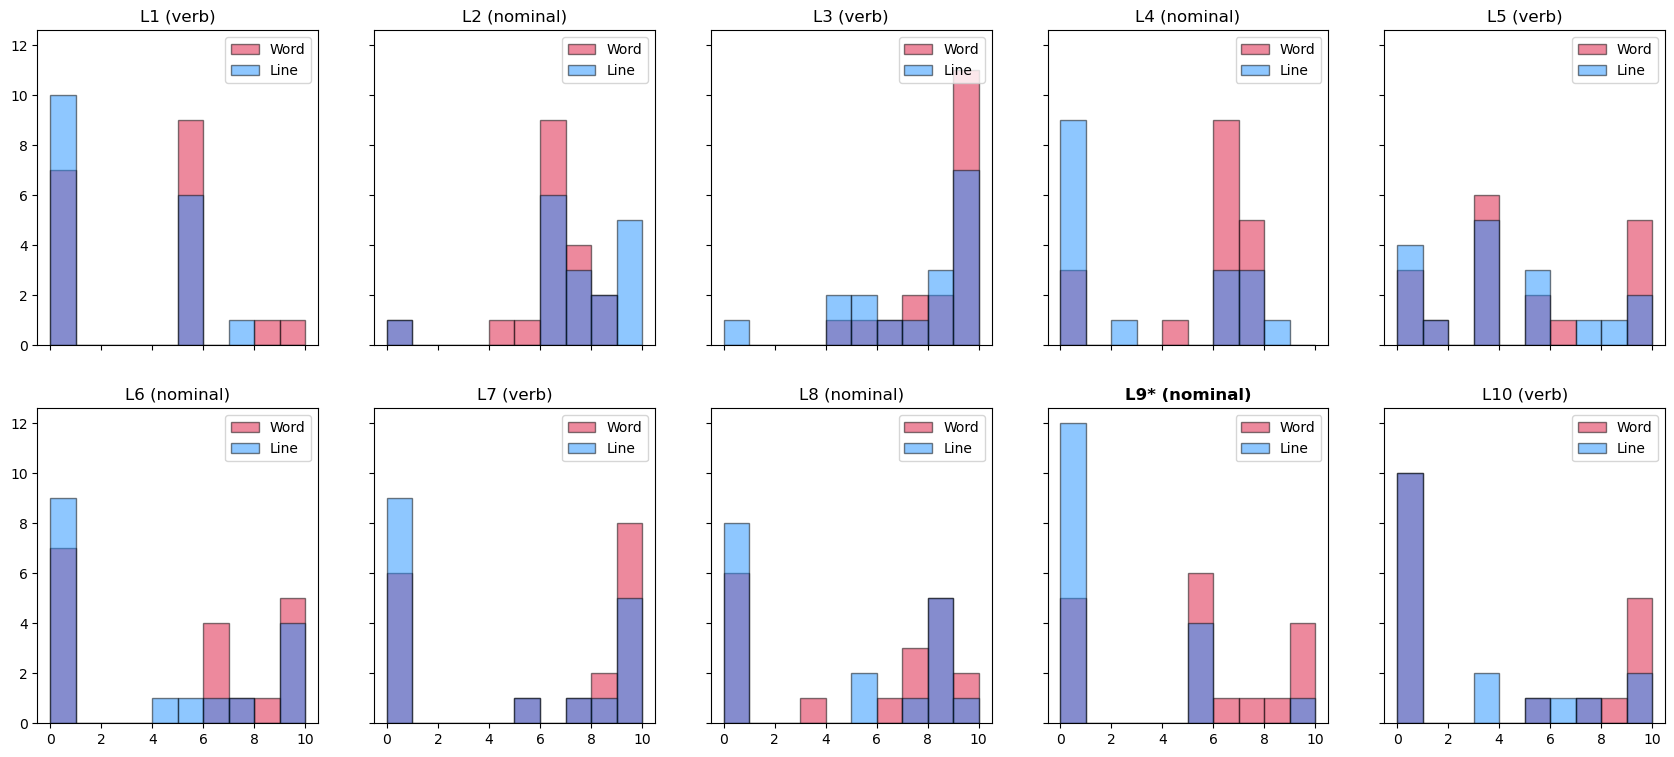

In [279]:
bins = np.linspace(0, 10, 11)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(21,9), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    q=i+1
    q_name='L'+str(q)
    t_test=stats.kruskal(df_word[q_name],df_phrase[q_name])
    print(t_test)
    ax.hist(df_word[q_name], bins, color='crimson', alpha=0.5, edgecolor='black', label='Word')
    ax.hist(df_phrase[q_name], bins, color='dodgerblue', alpha=0.5, edgecolor='black', label='Line')
    ax.legend(loc='upper right')
    if t_test[1]<.01:
        ax.set_title(q_name+"** ("+question_types[q-1]+")",fontweight="bold")
    elif t_test[1]<.05:
        ax.set_title(q_name+"* ("+question_types[q-1]+")",fontweight="bold")
    else:
        ax.set_title(q_name+" ("+question_types[q-1]+")")
    #ax.set_xticks(df.iloc[:,0])
plt.show()

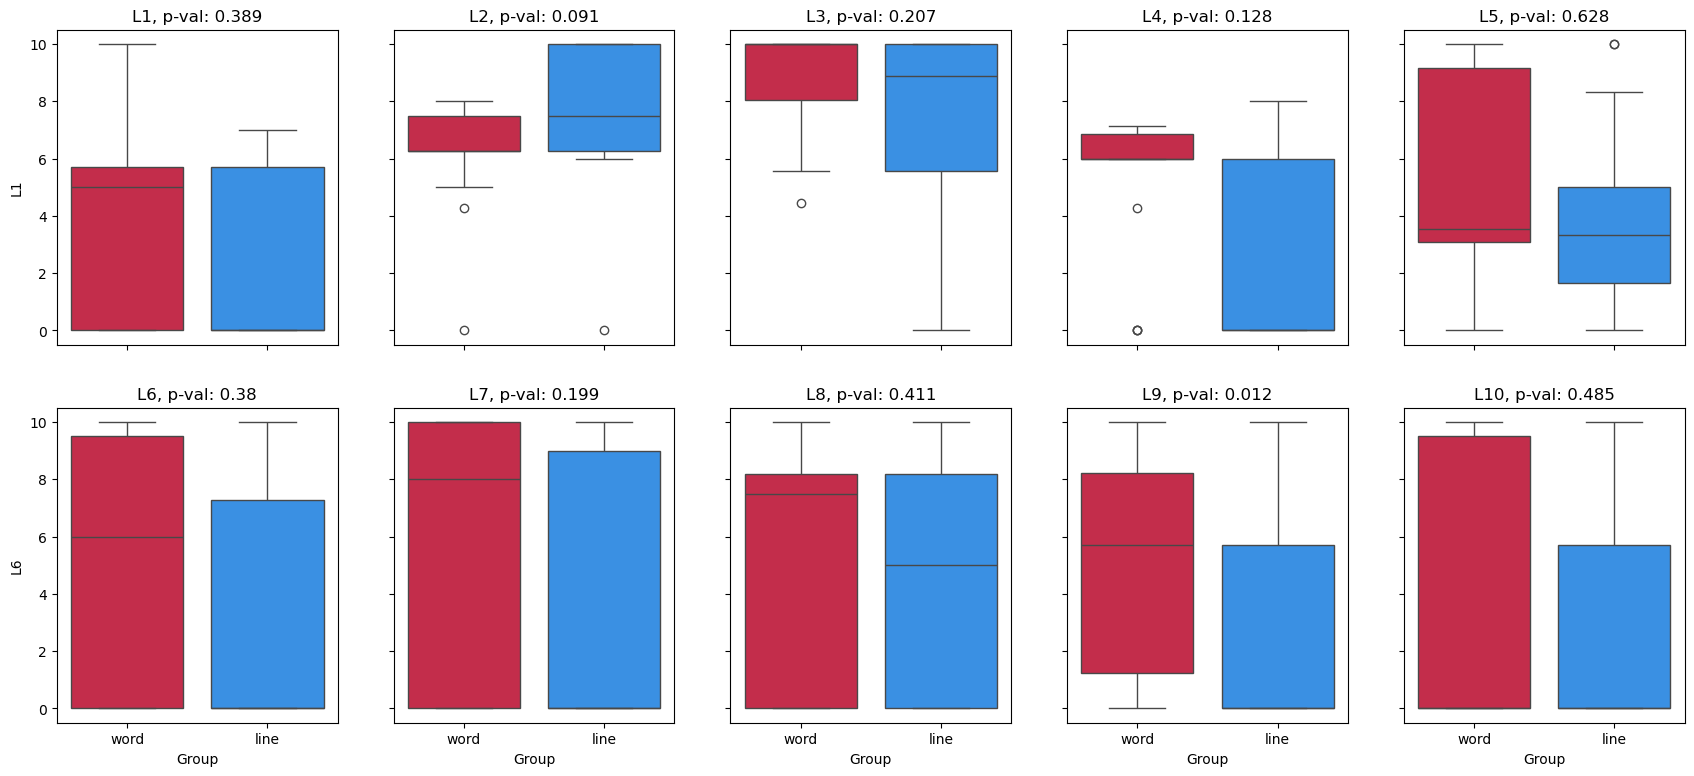

In [281]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(21,9), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    q=i+1
    q_name='L'+str(q)
    sns.boxplot(
        x="Group", 
        y=q_name, 
        hue="Group", 
        palette=['crimson', 'dodgerblue'], 
        data=df_with_outlier,
        legend=False,
        ax=ax
    ).set_title(q_name+", p-val: "+str(round(stats.kruskal(df_word[q_name],df_phrase[q_name]).pvalue,3)))
    #ax.legend(loc='upper right')
plt.show()

## Semantic Scores

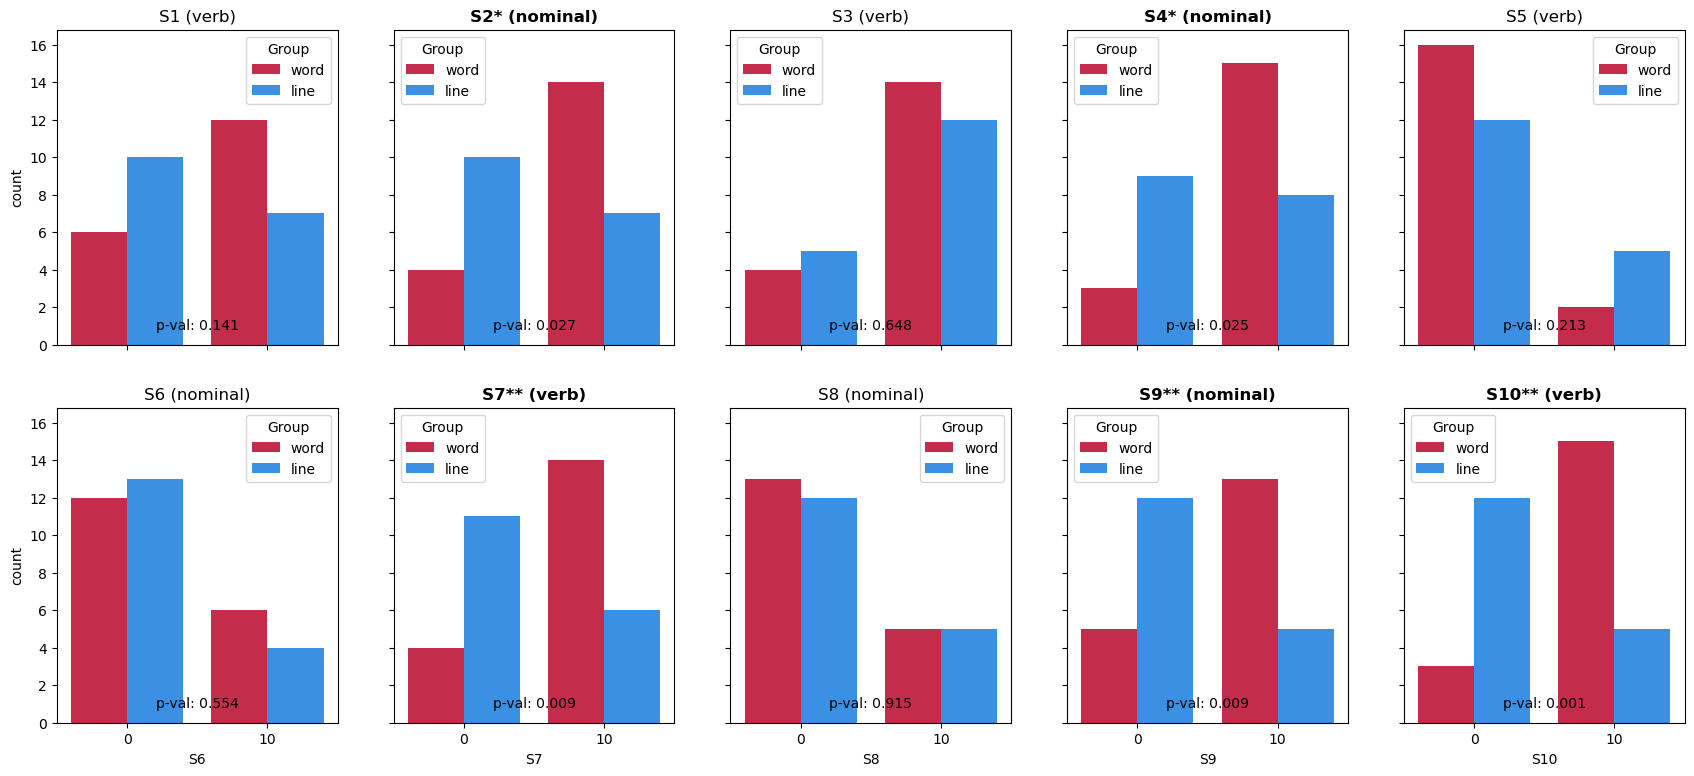

In [229]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(21,9), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    q=i+1
    q_name='S'+str(q)
    sns.countplot(data=df_with_outlier, 
                  x=q_name, 
                  hue='Group',
                  order=[0,10],
                  palette=['crimson', 'dodgerblue'], 
                  ax=ax)
    prop_test=proportion.test_proportions_2indep(df_word[q_name].value_counts()[10],len(df_word[q_name]),df_phrase[q_name].value_counts()[10],len(df_phrase[q_name]))
    if prop_test.pvalue<.01:
        ax.set_title(q_name+"** ("+question_types[q-1]+")",fontweight="bold")
    elif prop_test[1]<.05:
        ax.set_title(q_name+"* ("+question_types[q-1]+")",fontweight="bold")
    else:
        ax.set_title(q_name+" ("+question_types[q-1]+")")
    
    anc = AnchoredText("p-val: "+str(round(prop_test.pvalue,3)),
                       loc="lower center", frameon=False)
    ax.add_artist(anc)
    